In [1]:
import pandas
import datetime
import matplotlib.pyplot as plt
import numpy
from matplotlib.dates import DateFormatter,\
             HourLocator, MinuteLocator
%matplotlib inline

In [2]:
# read data from the lshell file
rbspSDVelDF = pandas.read_csv("../data/westWards-mar16.txt", sep=' ',\
                             infer_datetime_format=True, parse_dates=["eventTime"])
rbspSDVelDF.columns
print rbspSDVelDF.head()

   estVelAzim  estVelMagn           eventTime  losVelAzim  losVelMagn  \
0       -90.0  280.884211 2013-03-16 08:00:00      -11.90    -57.9195   
1       -90.0  283.358458 2013-03-16 08:02:00      -11.90    -58.4297   
2       -90.0  316.614815 2013-03-16 08:04:00      -11.90    -65.2873   
3       -90.0  279.515180 2013-03-16 08:06:00      -11.90    -57.6372   
4       -90.0  231.790543 2013-03-16 08:08:00      -15.14    -60.5387   

   rbspLocMlat  rbspLocMlt   sat  
0      57.9250     22.8277  satB  
1      58.0943     22.8707  satB  
2      58.2586     22.8959  satB  
3      58.3906     22.9246  satB  
4      58.5286     22.9671  satB  


In [3]:
# Seperate out sat A and sat B
sdFpRbspSatADF = rbspSDVelDF[ rbspSDVelDF["sat"] == "satA" ].reset_index(drop=True)
sdFpRbspSatBDF = rbspSDVelDF[ rbspSDVelDF["sat"] == "satB" ].reset_index(drop=True)
sdFpRbspSatBDF.head(20)

,estVelAzim,estVelMagn,eventTime,losVelAzim,losVelMagn,rbspLocMlat,rbspLocMlt,sat
0,-90.0,280.884211,2013-03-16 08:00:00,-11.90,-57.9195,57.9250,22.8277,satB
1,-90.0,283.358458,2013-03-16 08:02:00,-11.90,-58.4297,58.0943,22.8707,satB
2,-90.0,316.614815,2013-03-16 08:04:00,-11.90,-65.2873,58.2586,22.8959,satB
3,-90.0,279.515180,2013-03-16 08:06:00,-11.90,-57.6372,58.3906,22.9246,satB
4,-90.0,231.790543,2013-03-16 08:08:00,-15.14,-60.5387,58.5286,22.9671,satB
5,-90.0,267.718620,2013-03-16 08:10:00,-11.90,-55.2047,58.6763,23.0007,satB
6,-90.0,308.593639,2013-03-16 08:12:00,-11.90,-63.6333,58.8090,23.0281,satB
7,-90.0,484.958943,2013-03-16 08:14:00,-8.66,-73.0206,58.9329,23.0580,satB
8,-90.0,484.958943,2013-03-16 08:16:00,-8.66,-73.0206,59.0300,23.0898,satB
9,-90.0,611.377310,2013-03-16 08:18:00,-8.66,-92.0555,59.1633,23.1151,satB


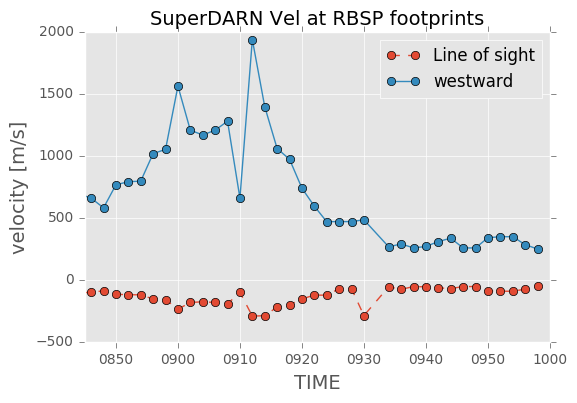

In [4]:
plt.style.use('ggplot')
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot_date( x=sdFpRbspSatBDF["eventTime"], y=sdFpRbspSatBDF["losVelMagn"], linestyle="--", label="Line of sight" )
ax.plot_date( x=sdFpRbspSatBDF["eventTime"], y=sdFpRbspSatBDF["estVelMagn"], linestyle="-", label="westward" )
ax.set_ylabel( "velocity [m/s]", fontsize=14 )
ax.set_xlabel( "TIME", fontsize=14 )
ax.set_title('SuperDARN Vel at RBSP footprints', fontsize=14)
ax.set_xlim( [ datetime.datetime(2013,3,16,8,45), datetime.datetime(2013,3,16,10,0) ] )
# format the x tick marks
ax.xaxis.set_major_formatter(DateFormatter('%H%M'))
# ax.xaxis.set_minor_formatter(DateFormatter('\n%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval=10))
ax.legend()
ax.get_figure().savefig( "../figs/vFit-westwards.pdf", bbox_inches='tight' )

In [5]:
sdFpRbspSatADF["rbspTimeStr"] = [x.strftime("%H%M") for x in sdFpRbspSatADF['eventTime']]
sdFpRbspSatBDF["rbspTimeStr"] = [x.strftime("%H%M") for x in sdFpRbspSatBDF['eventTime']]
# round off some columns
sdFpRbspSatADF["estVelMagn"] = sdFpRbspSatADF["estVelMagn"].round(2)
sdFpRbspSatADF["losVelMagn"] = sdFpRbspSatADF["losVelMagn"].round(2)
sdFpRbspSatADF["rbspLocMlat"] = sdFpRbspSatADF["rbspLocMlat"].round(2)
sdFpRbspSatADF["rbspLocMlt"] = sdFpRbspSatADF["rbspLocMlt"].round(2)
sdFpRbspSatBDF["estVelMagn"] = sdFpRbspSatBDF["estVelMagn"].round(2)
sdFpRbspSatBDF["losVelMagn"] = sdFpRbspSatBDF["losVelMagn"].round(2)
sdFpRbspSatBDF["rbspLocMlat"] = sdFpRbspSatBDF["rbspLocMlat"].round(2)
sdFpRbspSatBDF["rbspLocMlt"] = sdFpRbspSatBDF["rbspLocMlt"].round(2)
# sdFpRbspSatBDF = numpy.round( sdFpRbspSatBDF, 2 )
# sdFpRbspSatADF.to_csv( "../data/mar16-fit-rbspA.txt",\
#                       columns=["estVelAzim", "estVelMagn",\
#                                "eventTime", "losVelAzim",\
#                                "losVelMagn", "rbspLocMlat",\
#                                "rbspLocMlt", "rbspTimeStr"], sep=' ', index=False )
sdFpRbspSatBDF.to_csv( "../data/mar16-fit-rbspB.txt",\
                      columns = ["estVelAzim", "estVelMagn", "rbspTimeStr",\
                                 "losVelAzim", "losVelMagn", "rbspLocMlat",\
                                  "rbspLocMlt"],\
                      sep=' ', index=False, header=False )
sdFpRbspSatADF.to_csv( "../data/mar16-fit-rbspA.txt",\
                      columns = ["estVelAzim", "estVelMagn", "rbspTimeStr",\
                                 "losVelAzim", "losVelMagn", "rbspLocMlat",\
                                  "rbspLocMlt"],\
                      sep=' ', index=False, header=False )